### Coding with Qiskit 1

Before solving this notebook, make sure you have `Qiskit > 1.0` or higher and `Qiskit-ibm-runtime > 0.28` or higher installed. You must use `EstimatorV2` for your solution.

In [ ]:
# To Install:
# !pip install qiskit
# !pip install qiskit-ibm-runtime
# !pip install qiskit[visualization]
# !pip install qiskit-aer

#### Creating the quantum circuit

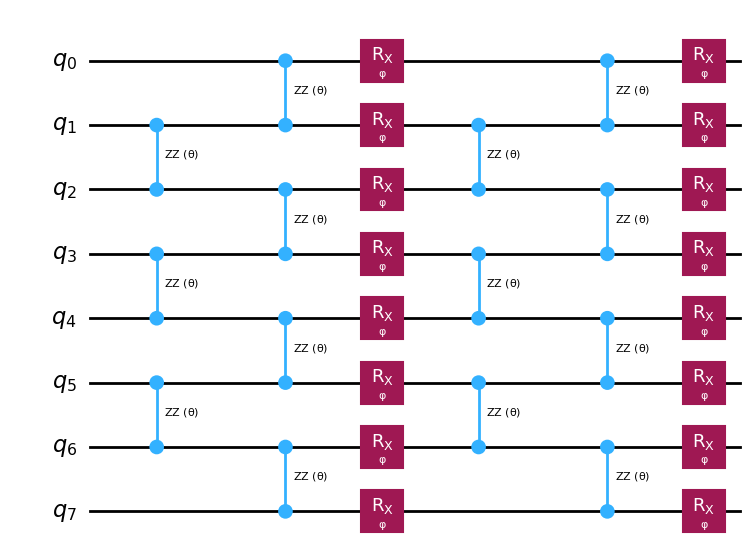

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('θ')
phi = Parameter('φ')
num_qubits = 8
num_steps = 2

qc = QuantumCircuit(num_qubits)
for _ in range(num_steps):
    for i in range(1, num_qubits-1, 2):
        qc.rzz(theta, i, i+1)
    for i in range(0, num_qubits, 2):
        qc.rzz(theta, i, i+1)
    for i in range(num_qubits):
        qc.rx(phi, i)

qc.draw('mpl', fold=-1)

The goal of this exercise will be to calculate the ideal and noisy expectation values of the specified observables for a range of parameter values. In particular, both $\theta$ and $\phi$ will be varied between $0$ and $\pi$ in 5 equal intervals.

#### Q1. Generate parameters

In this step you need to generate 5 equal interval values between $[0,\pi]$ for each of $\theta$ and $\phi$. Create a copy of the circuit, assign a parameter of your choice, and draw the circuit.

Angle Values:  [0.         0.78539816 1.57079633 2.35619449 3.14159265]


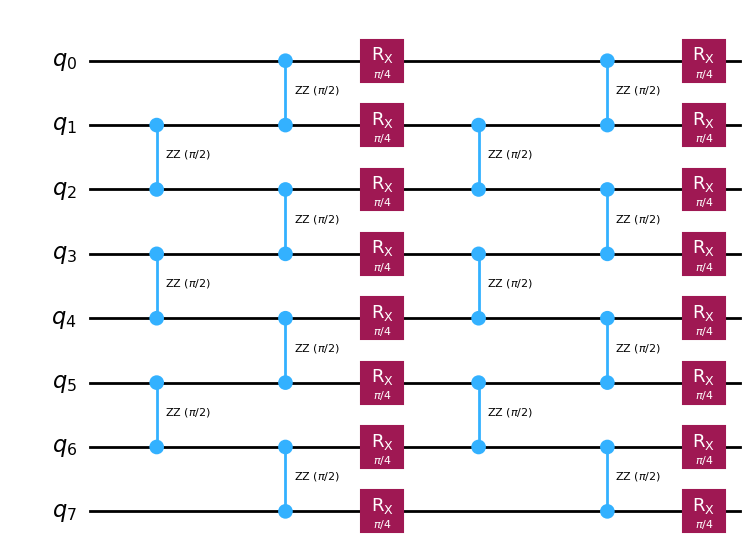

In [2]:
### Your solution here
import numpy as np
import math

# The 5 values will be 0, pi/4, pi/2, 3pi/4, pi
angle_values = np.linspace(0,math.pi,5)
print('Angle Values: ', angle_values)

# Test if the parameter assignment works for phi = pi/4 and theta = pi/2
qc_new = qc.assign_parameters({phi: angle_values[1], theta: angle_values[2]})
qc_new.draw('mpl', fold=-1)

#### Q2. Transpile the circuit

In this step you will consider `FakeKolkataV2` as your `backend`.

- Transpile the circuit on this backend.
- Print the different gates and their counts in the transpiled circuit.
- Print the layout (i.e., the physical qubits on which the circuit is placed) of the transpiled circuit.

Gate rz with gate count: 61
Gate sx with gate count: 32
Gate cx with gate count: 28
Circuit Depth:  22
Total Gate Count:  121


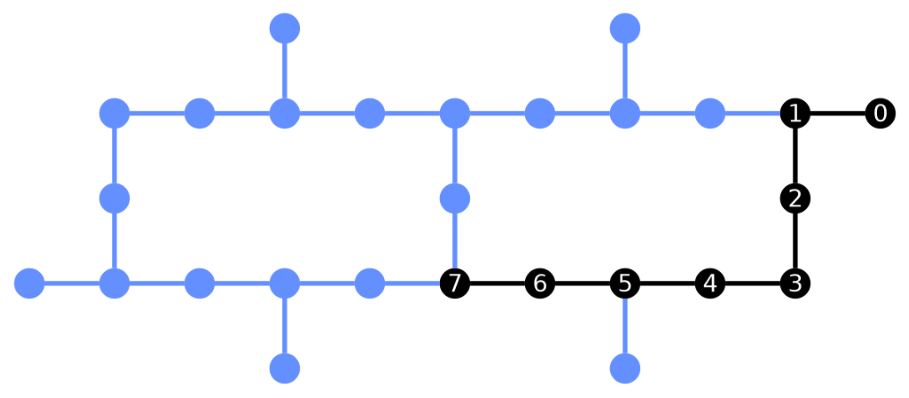

In [3]:
### Your solution here
from qiskit_ibm_runtime.fake_provider import FakeKolkataV2
from qiskit.visualization import plot_circuit_layout
from qiskit import transpile

backend = FakeKolkataV2()
transpiled_circuit = transpile(qc, backend=backend)

depth = transpiled_circuit.depth()
total_gate_count = sum(transpiled_circuit.count_ops().values())

gate_counts = transpiled_circuit.count_ops()
for gate in gate_counts:
    print(f'Gate {gate} with gate count: {gate_counts[gate]}')

print('Circuit Depth: ', depth)
print('Total Gate Count: ', total_gate_count)

plot_circuit_layout(transpiled_circuit, backend)

#### Q3. Construct observable

In this step you will

- Construct the following observable: $\sum_{i=1}^{N}\langle Z_i \rangle / N$ where $N$ is the number of qubits.
- Apply the layout of the transpiled circuit to this observable. Print the observable after applying layout.

In [4]:
### Your solution here
from qiskit.quantum_info import SparsePauliOp

# paulis = [("I" * i + "Z" + "I" * (num_qubits - i - 1), 1 / num_qubits) for i in range(num_qubits)]
paulis = []
for i in range(num_qubits):
    pauli = ("I" * i + "Z" + "I" * (num_qubits - i - 1), 1 / num_qubits)
    paulis.append(pauli)

observable = SparsePauliOp.from_list(paulis)
print('Observable on Quantum Circuit:\n', observable)

transpiled_obs = observable.apply_layout(transpiled_circuit.layout)
print('\nObservable on Transpiled Circuit:\n', transpiled_obs)

Observable on Quantum Circuit:
 SparsePauliOp(['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ'],
              coeffs=[0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
 0.125+0.j, 0.125+0.j])

Observable on Transpiled Circuit:
 SparsePauliOp(['IIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
 0.125+0.j, 0.125+0.j])


#### Q4. Prepare for execution

In this step you will create

- Primitive Unified Bloc (PUB) for each possible parameter combination (i.e., there will be $5\times5 = 25$ possible parameter combinations).

In [5]:
### Your solution here
params = []
for angle1 in angle_values:
    for angle2 in angle_values:
        params.append((angle1, angle2))

pub = (transpiled_circuit, transpiled_obs, params)
print(pub)

(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fa435d488f0>, SparsePauliOp(['IIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
 0.125+0.j, 0.125+0.j]), [(0.0, 0.0), (0.0, 0.7853981633974483), (0.0, 1.5707963267948966), (0.0, 2.356194490192345), (0.0, 3.141592653589793), (0.7853981633974483, 0.0), (0.7853981633974483, 0.7853981633974483), (0.7853981633974483, 1.5707963267948966), (0.7853981633974483, 2.356194490192345), (0.7853981633974483, 3.141592653589793), (1.5707963267948966, 0.0), (1.5707963267948966, 0.7853981633974483), (1.5707963267948966, 1.5707963267948966), (1.5707963267948966, 2.356194490192345), (1.5707963267948966, 3.141592653589793), (2.356194490192345, 0.0), (2.356194490192345

#### Q5. Noiseless execution

In this step you will

- Construct a `StatevectorEstimator`
- Execute all the PUBs as a **single job**
- Obtain the expectation value for each parameter combination; store the result

In [ ]:
# ### Your solution here
from qiskit.primitives import StatevectorEstimator

'''
Simulating only for 1 value because it took too long for multiple values
This is because the Statevector Estimator keeps track of the whole quantum state,
and the circuit has been transpiled to to FakeKolkataV2, which has 27 qubits.
This is too many qubits for a small classical system to run.
'''

params2 = [params[-1]]
pub2 = (transpiled_circuit, transpiled_obs, params2)
print(pub2)

estimator = StatevectorEstimator()
job = estimator.run([pub2], precision=3)
result = job.result()[0]

print(f"Expectation values: {result.data.evs}")

#### Q6. Noisy execution

In this step you will

- Construct an `EstimatorV2` object with `FakeKolkataV2` as the backend
- Execute all the PUBs as a **single job**
- Obtain the expectation value for each parameter combination
  
- In a single plot where X-axis is $\theta$ and Y-axis is $\Phi$, plot the outcomes of the noisy and noiseless expectation values
- *Instead of the above, we will plot a heatmap where the x-axis denotes $\theta$, and the y-axis denotes $\Phi$, and the colours tell us the expectation values. We will do this for all 3 cases: Noise, Noiseless, Custom Noise*

In [6]:
### Your solution here
from qiskit_aer.primitives import EstimatorV2

estimator2 = EstimatorV2()
job2 = estimator2.run([pub])
result2 = job2.result()[0]
print(f"Expectation values: {result2.data.evs}")

Expectation values: [ 1.00000000e+00  1.48860958e-16 -1.00000000e+00 -5.39282161e-16
  1.00000000e+00  1.00000000e+00  3.17861652e-01 -5.51776695e-01
  3.17861652e-01  1.00000000e+00  1.00000000e+00  6.87500000e-01
  0.00000000e+00  6.87500000e-01  1.00000000e+00  1.00000000e+00
  4.94638348e-01 -1.98223305e-01  4.94638348e-01  1.00000000e+00
  1.00000000e+00  2.50000000e-01 -5.00000000e-01  2.50000000e-01
  1.00000000e+00]


#### Q7. Building towards error mitigation

In this step you will create the framework for error mitigation. Obtaining error mitigated results in not possible on a noisy simulator. For this example, we want the following

- Apply Dynamical Decoupling with `XY4` pulse
- Apply Zero Noise Extrapolation with `[1,2,3]` as the noise factors and `exponential` extrapolator
- Turn on Gate Twirling
- Turn off Measurement Twirling
- Turn off Measurement Error Mitigation

Construct an `EstimatorV2` object with the previously stated error mitigation and suppression options.

In [7]:
### Your solution here
from qiskit_ibm_runtime import EstimatorV2, EstimatorOptions

options = EstimatorOptions()

options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

options.resilience.zne_mitigation = True
options.resilience.zne.noise_factors = [1,2,3]
options.resilience.zne.extrapolator = 'exponential'

options.twirling.enable_gates = True
options.twirling.enable_measure = False
options.resilience_level = 0  # Turn off measurement error mitigation

estimator3 = EstimatorV2(backend, options=options)
job3 = estimator3.run([pub])
result3 = job3.result()[0]
print(f"\nExpectation values: {result3.data.evs}")

/home/chasmiccoder/.local/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")
/home/chasmiccoder/.local/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:269: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}, 'resilience': {'zne_mitigation': True, 'zne': {'noise_factors': [1.0, 2.0, 3.0], 'extrapolator': 'exponential'}}, 'twirling': {'enable_gates': True, 'enable_measure': False}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")



Expectation values: [ 0.96618652  0.01940918 -0.93676758  0.01318359  0.93469238  0.9664917
  0.31750488 -0.51983643  0.29144287  0.94134521  0.96276855  0.65441895
  0.00640869  0.63922119  0.940979    0.9621582   0.48010254 -0.17938232
  0.45690918  0.93969727  0.96246338  0.24957275 -0.45739746  0.24487305
  0.93884277]


### Visualizing Results

In [12]:
print(qc.parameters)

ParameterView([Parameter(θ), Parameter(φ)])


In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

def plot_heatmap(expectation_values, angles):
    angles = np.array(angles).round(3)
    expectation_values = np.reshape(expectation_values, (len(angles),len(angles)))
    print(expectation_values)
    hm = sn.heatmap(data=expectation_values, 
                    xticklabels=angles, yticklabels=angles)
    hm.set(xlabel='theta', ylabel='phi')
    plt.show()


### Results over EstimatorV2

[[ 1.00000000e+00  1.48860958e-16 -1.00000000e+00 -5.39282161e-16
   1.00000000e+00]
 [ 1.00000000e+00  3.17861652e-01 -5.51776695e-01  3.17861652e-01
   1.00000000e+00]
 [ 1.00000000e+00  6.87500000e-01  0.00000000e+00  6.87500000e-01
   1.00000000e+00]
 [ 1.00000000e+00  4.94638348e-01 -1.98223305e-01  4.94638348e-01
   1.00000000e+00]
 [ 1.00000000e+00  2.50000000e-01 -5.00000000e-01  2.50000000e-01
   1.00000000e+00]]


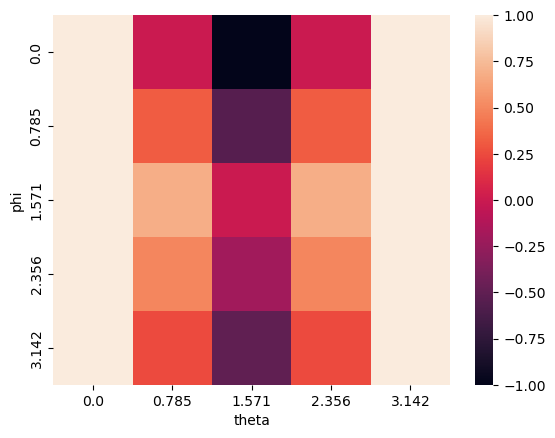

In [16]:
plot_heatmap(result2.data.evs, angle_values)

### Results over Custom Framework for Error Mitigation

[[ 0.96618652  0.01940918 -0.93676758  0.01318359  0.93469238]
 [ 0.9664917   0.31750488 -0.51983643  0.29144287  0.94134521]
 [ 0.96276855  0.65441895  0.00640869  0.63922119  0.940979  ]
 [ 0.9621582   0.48010254 -0.17938232  0.45690918  0.93969727]
 [ 0.96246338  0.24957275 -0.45739746  0.24487305  0.93884277]]


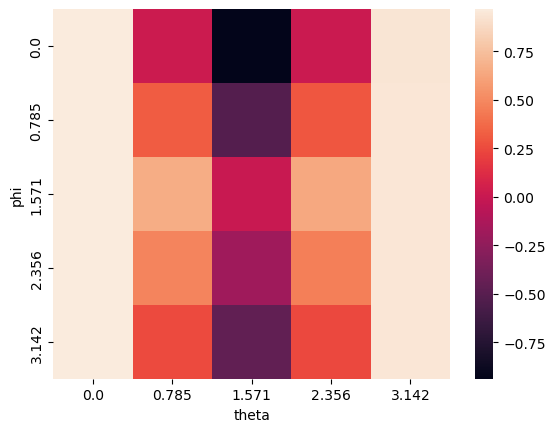

In [17]:
plot_heatmap(result3.data.evs, angle_values)

### Interpreting the Result
1. We see maximum expectation value of the observable for when $\theta$ is 0.
This means that the gate ZZ($\theta$) always implemented ZZ(0) which is the identity gate. This is why measuring the observable Z, we see that the state always collapses to $\ket{0}$ which gives an observation (eigenvalue) of +1, thus giving an expectation value of +1. 
2. The smallest expectation value is seen when $\theta=\pi/2$ and $\phi=0$
3. The expectation value is 0 when both the angles are $\pi/2$, which is when the state is equally likely to collapse to either $\ket{0}$ or $\ket{1}$.

### References
1. https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit
2. https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.Parameter
3. https://docs.quantum.ibm.com/api/qiskit/transpiler
4. https://qiskit.github.io/qiskit-addon-mthree/tutorials/04_dynamic_bv
5. https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorEstimator
6. https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/estimator-v2
7. https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/options-zne-options
8. https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/options-twirling-options